In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
in_filename = 'E:\Subash\AI\Car_MPG_Data.csv'

In [8]:
df = pd.read_csv(in_filename, sep=',', index_col=None)

In [9]:
data_array = pd.DataFrame(df, columns=['MPG', 'Acceleration'])

In [10]:
# Define learning rate and iterations
learning_rate = 0.0001
iterations = 1000

In [11]:
# Compute error for the line given the points
pts = data_array.reset_index().values
def Compute_Error(b, m, pts):
    TotalError = 0
    for val in range(0, len(pts)):
        x = pts[val, 2]
        y = pts[val, 1]
        TotalError += (y - (m * x + b)) ** 2
    return ('Error: ', TotalError / float(len(pts)))

In [12]:
# Step gradient function
def Step_Gradient(b_latest, m_latest, pts, learning_rate):
    b_gradient = 0; m_gradient = 0; n = float(len(pts))
    for val in range(0, len(pts)):
        x = pts[val, 2]
        y = pts[val, 1]
        b_gradient += -(2/n) * (y - ((m_latest * x) + b_latest))
        m_gradient += -(2/n) * x * (y - ((m_latest * x ) + b_latest))
    updated_b = b_latest - (learning_rate * b_gradient)
    updated_m = m_latest - (learning_rate * m_gradient)
    return (updated_b, updated_m)

In [13]:
# Gradient descent
def Gradient_Descent(pts, initial_b, initial_m, learning_rate, num_iter):
    b = initial_b; m = initial_m
    for val in range(num_iter):
        b , m = Step_Gradient(b, m, pts, learning_rate)
    return (b, m)

In [14]:
# Calculate Gradient Descent for Initial value and total iterations
b = 0; m = 0
Start_Error = Compute_Error(b, m, pts)
print 'Starting Error: ', Start_Error

Starting Error:  ('Error: ', 613.8712562814071)


In [15]:
[b, m] = Gradient_Descent(pts, b, m, learning_rate, iterations)
Error = Compute_Error(b, m, pts)
print 'Error after %d iterations' %iterations, Error

Error after 1000 iterations ('Error: ', 50.8852731718681)


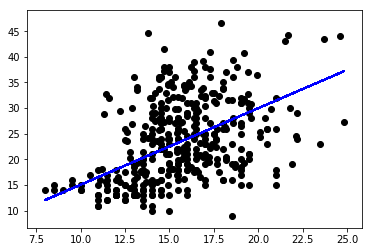

In [16]:
# Display using scatter plot the data points and the best fit line
for val in range(0, len(pts)):
    x = pts[val, 2]
    y = pts[val, 1]
    plt.scatter(x, y, color='black')
    plt.plot(data_array.Acceleration, (m * data_array.Acceleration + b), color='blue')

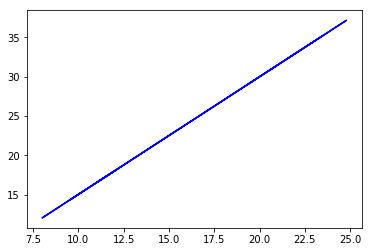

In [17]:
# Display the Gradient and y-intercept value in the form y = mx+c
plt.plot(data_array.Acceleration, (m * data_array.Acceleration + b), color='blue')